In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Spam dataset.csv to Spam dataset (1).csv


In [7]:
df = pd.read_csv("Spam dataset.csv" , encoding='latin-1')

In [8]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

## Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Drop Columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [12]:
df.sample(5)

,v1,v2
381,ham,"Yeah sure, give me a couple minutes to track d..."
4050,ham,"Motivate Behind every darkness, there is a shi..."
3366,ham,Hey what are you doing. Y no reply pa..
181,ham,Lol no. U can trust me.
94,ham,Havent planning to buy later. I check already ...


In [13]:
# Renaming the columns
df.rename(columns = {'v1':'Target','v2':'Text'}, inplace = True)

In [14]:
df.sample(5)

,Target,Text
627,ham,Yup i thk they r e teacher said that will make...
693,ham,Will purchase d stuff today and mail to you. D...
3031,ham,Jokin only lar... :-) depends on which phone m...
1455,spam,Summers finally here! Fancy a chat or flirt wi...
885,ham,Gibbs unsold.mike hussey


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
df['Target'] = encoder.fit_transform(df['Target'])

In [18]:
# Ham = 0
# Spam = 1

In [19]:
df.head(6)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [20]:
# Missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [21]:
# Check for duplicates values
df.duplicated().sum()

403

In [22]:
# Remove duplicates
df = df.drop_duplicates(keep = 'first')

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

## EDA

In [25]:
df.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [26]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

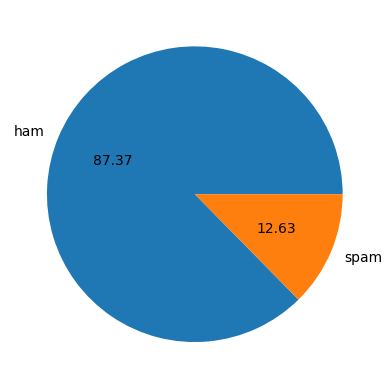

In [27]:
plt.pie(df['Target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f');

### Data is imbalanced

In [28]:
!pip install nltk

In [29]:
import nltk

In [30]:
import nltk
#nltk.data.path.append('path/to/your/nltk_data')

In [31]:
print(nltk.data.path)


['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
# Number of characters
df['num_characters'] = df['Text'].apply(len)

In [34]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
# Number of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
# Number of sentences
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# Ham Messages
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
# Spam Messages
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

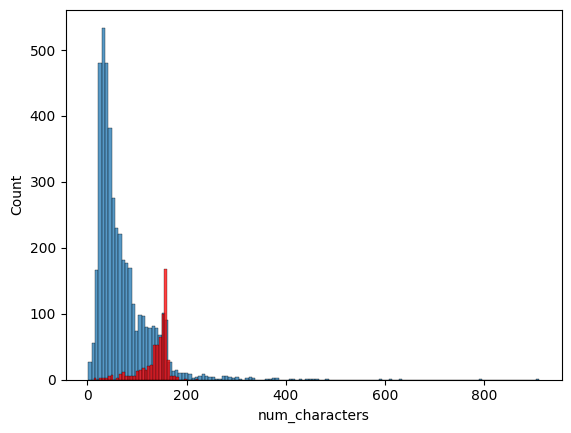

In [42]:
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

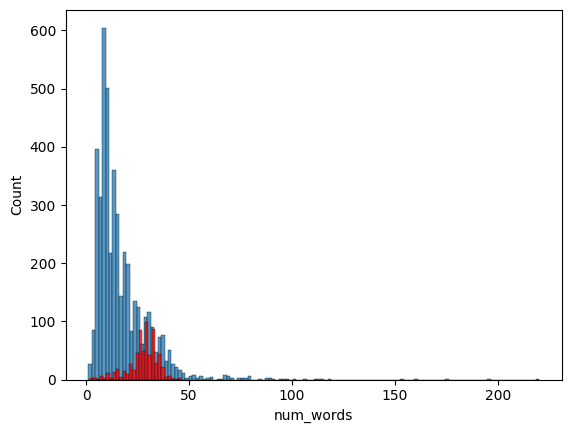

In [43]:
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'red')

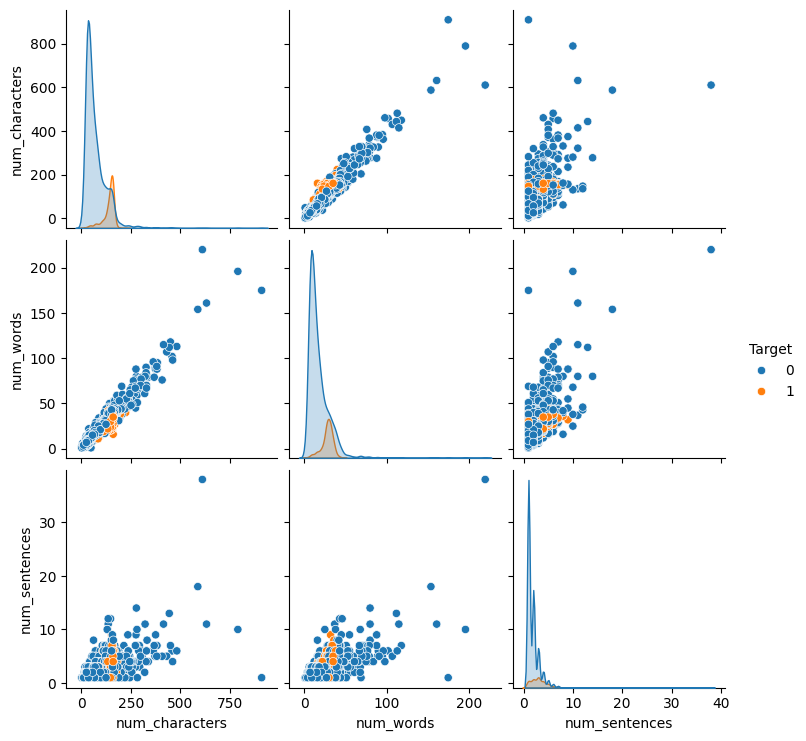

In [44]:
sns.pairplot(df, hue = 'Target')

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Target          5169 non-null   int64 
 1   Text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


<Axes: >

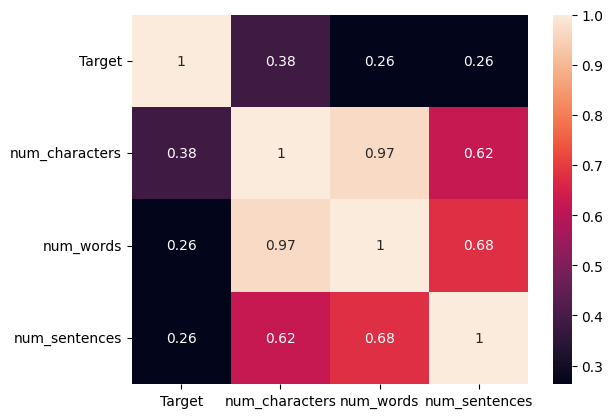

In [47]:
df.head()
df.info()
df.select_dtypes(include='object').head()
df_numeric = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)

##Data Preprocessing

In [48]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
def transform_text(text):
  text = text.lower()                  # Lower case
  text = nltk.word_tokenize(text)      # Tokenization

  y = []
  for i in text:
    if i.isalnum():                    # Removing special characters
      y.append(i)


  text = y[:]
  y.clear()

  for i in text:                       # Removing stopwords and punctuations
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)


  text = y[:]
  y.clear()

  for i in text:                        # Stemming
    y.append(ps.stem(i))

  return " ".join(y)

In [51]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [52]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=550, min_font_size=11, background_color='white')

In [54]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

(-0.5, 799.5, 549.5, -0.5)

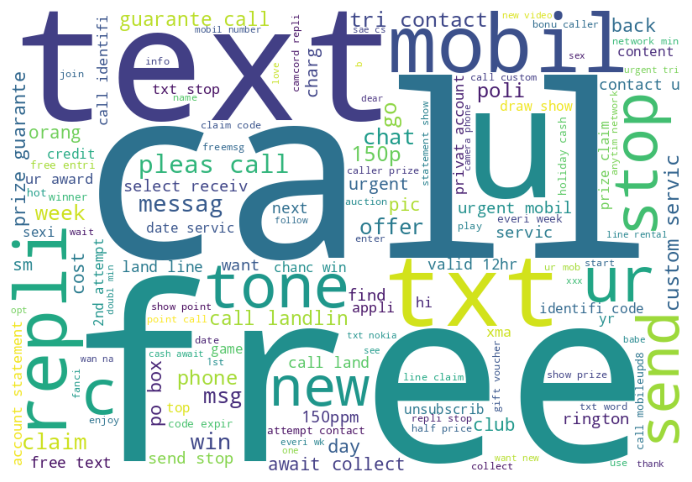

In [55]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)
plt.axis('off')

In [56]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

(-0.5, 799.5, 549.5, -0.5)

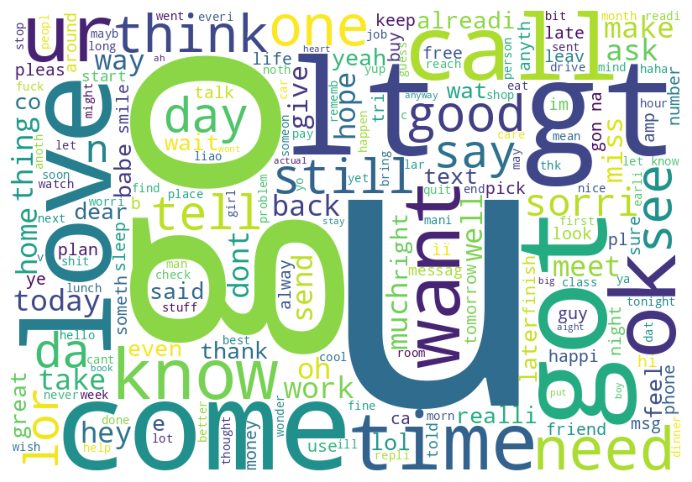

In [57]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)
plt.axis('off')

In [58]:
# List of all the words in spam messages
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [59]:
# Total number of words in all the spam messages
len(spam_corpus)

9939

In [60]:
from collections import Counter

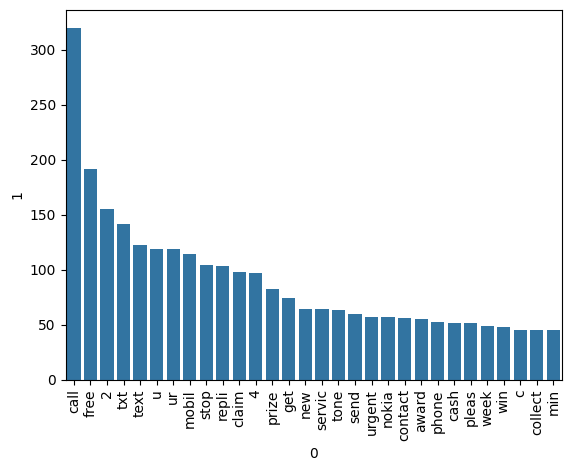

In [61]:
# Graph of top 30 common words in spam messages
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [62]:
# List of all the words in ham messages
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [63]:
# Total number of words in all the spam messages
len(ham_corpus)

35404

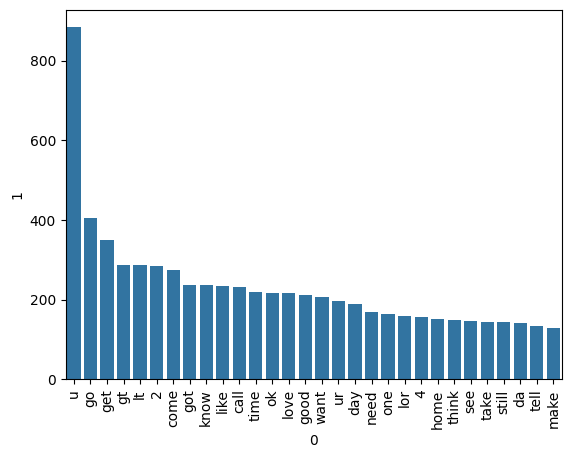

In [64]:
# Graph of top 30 common words in ham messages
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [65]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##Model Building

###Naive Bayes

In [66]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

####CountVectorizer Method

In [67]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5169, 6708)

In [69]:
y = df['Target'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [74]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [75]:
# Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test, y_pred1))
print('Confusion Matrix :',confusion_matrix(y_test, y_pred1))
print('Precision Score :',precision_score(y_test, y_pred1))

Accuracy Score : 0.8800773694390716
Confusion Matrix : [[792 104]
 [ 20 118]]
Precision Score : 0.5315315315315315


In [76]:
# Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test, y_pred2))
print('Confusion Matrix :',confusion_matrix(y_test, y_pred2))
print('Precision Score :',precision_score(y_test, y_pred2))

Accuracy Score : 0.9642166344294004
Confusion Matrix : [[871  25]
 [ 12 126]]
Precision Score : 0.8344370860927153


In [77]:
# Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test, y_pred3))
print('Confusion Matrix :',confusion_matrix(y_test, y_pred3))
print('Precision Score :',precision_score(y_test, y_pred3))

Accuracy Score : 0.9700193423597679
Confusion Matrix : [[893   3]
 [ 28 110]]
Precision Score : 0.9734513274336283


####TfidfVectorizer Method

In [78]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
X.shape

(5169, 3000)

In [80]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [82]:
# Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test, y_pred1))
print('Confusion Matrix :',confusion_matrix(y_test, y_pred1))
print('Precision Score :',precision_score(y_test, y_pred1))

Accuracy Score : 0.8694390715667312
Confusion Matrix : [[788 108]
 [ 27 111]]
Precision Score : 0.5068493150684932


In [83]:
# Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test, y_pred2))
print('Confusion Matrix :',confusion_matrix(y_test, y_pred2))
print('Precision Score :',precision_score(y_test, y_pred2))

Accuracy Score : 0.9709864603481625
Confusion Matrix : [[896   0]
 [ 30 108]]
Precision Score : 1.0


In [84]:
# Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score :',accuracy_score(y_test, y_pred3))
print('Confusion Matrix :',confusion_matrix(y_test, y_pred3))
print('Precision Score :',precision_score(y_test, y_pred3))

Accuracy Score : 0.9835589941972921
Confusion Matrix : [[895   1]
 [ 16 122]]
Precision Score : 0.991869918699187


#### TfidfVectorizer Method ---> Multinomial Naive Bayes

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [86]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [87]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [88]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [89]:
# Support Vector Classification
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [93]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [94]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


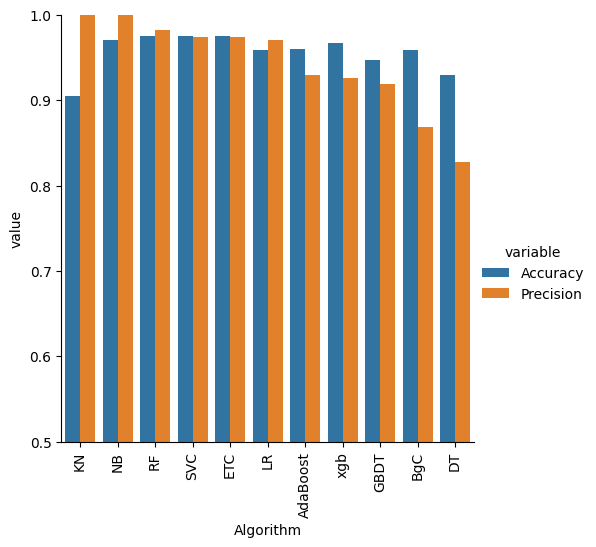

In [95]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model Improvement

####Change the max_features parameter of Tfidf

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [98]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [99]:
files.download('vectorizer.pkl')
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>